<a href="https://colab.research.google.com/github/michaelbram10/Case-Study-02-Data-Mining---Customer-Segmentation---Ganjil-2022---Kelompok-3/blob/main/Tambahan_buat_Case_Study_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import umap, numpy as np, matplotlib.pyplot as plt, pandas as pd, seaborn as sns
from sklearn import cluster, datasets
from sklearn.metrics import silhouette_score as siluet
from sklearn.metrics.cluster import homogeneity_score as purity
from sklearn.metrics import normalized_mutual_info_score as NMI 

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/michaelbram10/Case-Study-02-Data-Mining---Customer-Segmentation---Ganjil-2022---Kelompok-3/main/Data%20MixITUp%20Hasil%20Cleansing.csv')
df

,Unnamed: 0,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor
0,0,Wanita,49.0,13114754.0,52.0,1,Jakarta,1.0,Sabtu,2.0
1,1,Wanita,32.0,33606557.0,86.0,1,Depok,1.0,Minggu,6.0
2,2,Pria,51.0,15983606.0,41.0,1,Jakarta,2.0,Minggu,3.0
3,3,Pria,19.0,12704918.0,55.0,0,Jakarta,1.0,Rabu,7.0
4,4,Wanita,38.0,20081967.0,42.0,1,Jakarta,2.0,Senin,8.0
...,...,...,...,...,...,...,...,...,...,...
185,195,Pria,31.0,4098360.0,73.0,1,Depok,1.0,Senin,0.0
186,196,Pria,57.0,15983606.0,51.0,1,Jakarta,1.0,Minggu,5.0
187,197,Wanita,35.0,43032786.0,79.0,1,Depok,1.0,Senin,7.0
188,198,Wanita,23.0,1229508.0,94.0,1,Depok,0.0,Selasa,0.0


**Data Preparation for Clustering**

In [ ]:
df.info()
df['Kota'] = df['Kota'].astype('category')
df['Promo'] = df['Promo'].astype('object')
df['FavFlavor'] = df['FavFlavor'].astype('object')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Unnamed: 0            190 non-null    int64   
 1   Jenis Kelamin         190 non-null    object  
 2   Umur                  190 non-null    float64 
 3   Pendapatan-per-bulan  190 non-null    float64 
 4   skor-pengeluaran      190 non-null    float64 
 5   Menikah               178 non-null    object  
 6   Kota                  190 non-null    category
 7   Promo                 190 non-null    float64 
 8   HariFav               190 non-null    object  
 9   FavFlavor             190 non-null    float64 
dtypes: category(1), float64(5), int64(1), object(3)
memory usage: 13.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                -----------

Mengubah tipe data untuk kemudahan pengclusteran

In [ ]:
df2 = df.select_dtypes(include = ['float64'])
df2

,Umur,Pendapatan-per-bulan,skor-pengeluaran
0,49.0,13114754.0,52.0
1,32.0,33606557.0,86.0
2,51.0,15983606.0,41.0
3,19.0,12704918.0,55.0
4,38.0,20081967.0,42.0
...,...,...,...
185,31.0,4098360.0,73.0
186,57.0,15983606.0,51.0
187,35.0,43032786.0,79.0
188,23.0,1229508.0,94.0


In [ ]:
scaler = preprocessing.MinMaxScaler()
names = df2.columns
d = scaler.fit_transform(df2)
scaled_df2 = pd.DataFrame(d, columns = names)
scaled_df2.head()

,Umur,Pendapatan-per-bulan,skor-pengeluaran
0,0.810345,0.262295,0.51
1,0.517241,0.672131,0.85
2,0.844828,0.319672,0.40
3,0.293103,0.254098,0.54
4,0.620690,0.401639,0.41


In [ ]:
dfkota = df.select_dtypes(include = ['category'])


In [ ]:
frames = [df2, dfkota]
# df3 = pd.concat(frames, keys=['df2','dfkota'])
df3 = pd.concat([df2, dfkota], axis=1)
df3

,Umur,Pendapatan-per-bulan,skor-pengeluaran,Kota
0,49.0,13114754.0,52.0,Jakarta
1,32.0,33606557.0,86.0,Depok
2,51.0,15983606.0,41.0,Jakarta
3,19.0,12704918.0,55.0,Jakarta
4,38.0,20081967.0,42.0,Jakarta
...,...,...,...,...
185,31.0,4098360.0,73.0,Depok
186,57.0,15983606.0,51.0,Jakarta
187,35.0,43032786.0,79.0,Depok
188,23.0,1229508.0,94.0,Depok


Melakukan Scaling pada data dikarenakan data memiliki satuan yang berbeda pada tiap variabelnya

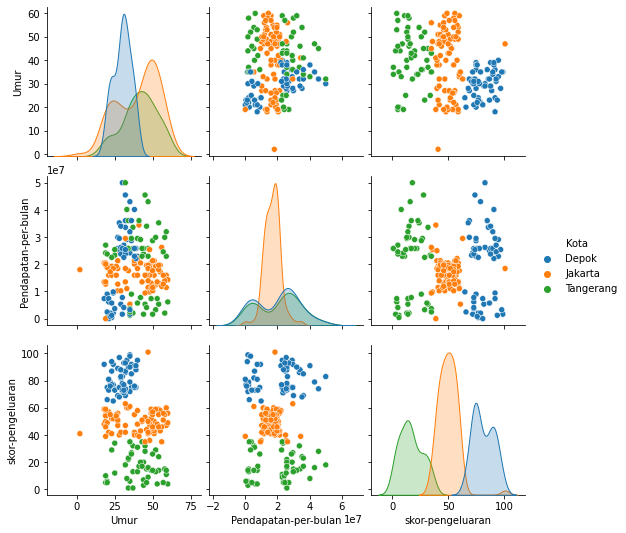

In [ ]:
g = sns.pairplot(df3,  hue="Kota")

In [ ]:
dfnum = df3.groupby("Kota")
dfjak = dfnum.get_group('Jakarta')
dfdep = dfnum.get_group('Depok')
dftang = dfnum.get_group('Tangerang')

In [ ]:
dfjak.drop(columns=['Kota'], inplace=True)
dfdep.drop(columns=['Kota'], inplace=True)
dftang.drop(columns=['Kota'], inplace=True)

Text(0.5, 1.0, 'Elbow curve')

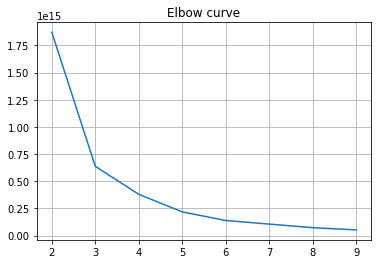

In [ ]:
# DEPOK
distorsions, k1, kN = [], 2, 10
for k in range(k1, kN):
    kmeans = cluster.KMeans(n_clusters=k).fit(dfdep)
    distorsions.append(kmeans.inertia_)
#fig = plt.figure(figsize=(15, 5))
plt.plot(range(k1, kN), distorsions); plt.grid(True)
plt.title('Elbow curve')

Text(0.5, 1.0, 'Elbow curve')

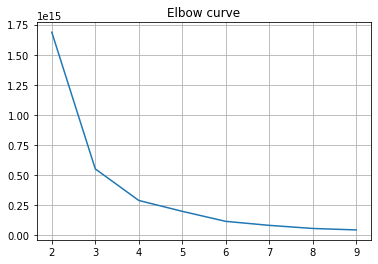

In [ ]:
# TANGERANG
distorsions, k1, kN = [], 2, 10
for k in range(k1, kN):
    kmeans = cluster.KMeans(n_clusters=k).fit(dftang)
    distorsions.append(kmeans.inertia_)
#fig = plt.figure(figsize=(15, 5))
plt.plot(range(k1, kN), distorsions); plt.grid(True)
plt.title('Elbow curve')

# JAKARTA

In [ ]:
random_state = 0

In [ ]:
scaler = preprocessing.MinMaxScaler()
names = dfjak.columns
d = scaler.fit_transform(dfjak)
scaled_dfjak = pd.DataFrame(d, columns = names)
scaled_dfjak.head()

,Umur,Pendapatan-per-bulan,skor-pengeluaran
0,0.810345,0.380952,0.257576
1,0.844828,0.464286,0.090909
2,0.293103,0.369048,0.303030
3,0.620690,0.583333,0.106061
4,0.431034,0.619048,0.318182


Melakukan scaling Data untuk Kota Jakarta karena satuan data tidak sama

Text(0.5, 1.0, 'Elbow curve')

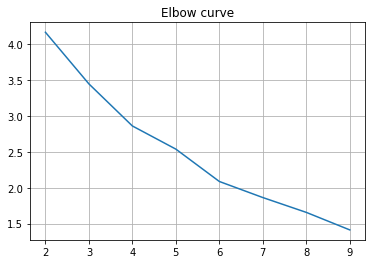

In [ ]:
# JAKARTA
distorsions, k1, kN = [], 2, 10
for k in range(k1, kN):
    kmeans = cluster.KMeans(n_clusters=k).fit(scaled_dfjak)
    distorsions.append(kmeans.inertia_)
#fig = plt.figure(figsize=(15, 5))
plt.plot(range(k1, kN), distorsions); plt.grid(True)
plt.title('Elbow curve')

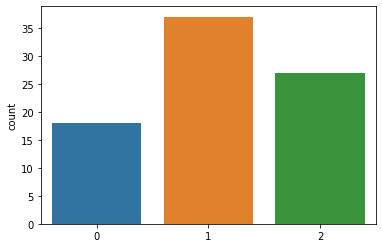

In [ ]:
# JAKARTA 
k=3
kmPPJ3 = cluster.KMeans(n_clusters=k, init='k-means++', max_iter=300, tol=0.0001, random_state = random_state)
kmPPJ3.fit(scaled_dfjak)
C_kmppJ3 = kmPPJ3.predict(scaled_dfjak)

sns.countplot(C_kmppJ3)

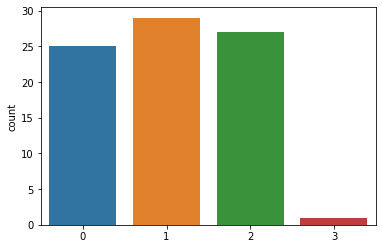

In [ ]:
# JAKARTA 
k=4
kmPPJ4 = cluster.KMeans(n_clusters=k, init='k-means++', max_iter=300, tol=0.0001, random_state = random_state)
kmPPJ4.fit(scaled_dfjak)
C_kmppJ4 = kmPPJ4.predict(scaled_dfjak)

sns.countplot(C_kmppJ4)

In [ ]:
kmPPJ4.inertia_

2.956683459748091

array([2, 2, 0, 1, 0, 0, 0, 2, 0, 2], dtype=int32)

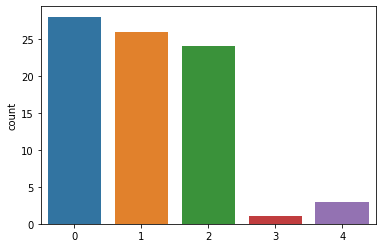

In [ ]:
k=5
kmPPJ5 = cluster.KMeans(n_clusters=k, init='k-means++', max_iter=300, tol=0.0001, random_state = random_state)
kmPPJ5.fit(scaled_dfjak)
C_kmppJ5 = kmPPJ5.predict(scaled_dfjak)

sns.countplot(C_kmppJ5)
C_kmppJ5[:10]

In [ ]:
kmPPJ5.inertia_

2.5137934604720464

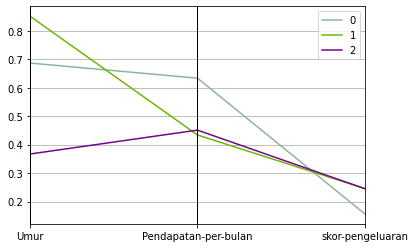

In [ ]:
cols = ['Umur','Pendapatan-per-bulan','skor-pengeluaran']
dfC = pd.DataFrame(kmPPJ3.cluster_centers_, columns=cols)
dfC['cluster'] = dfC.index

pd.plotting.parallel_coordinates(dfC, 'cluster')
plt.show()

Cluster 0 -> Customer dengan umur sedang memiliki pendapatan yang sedang, memiliki skor pengeluaran paling rendah
Cluster 1 -> Customer dengan umur sedang memiliki pendapatan yang sedang, memiliki skor pengeluaran paling rendah

# Depok

Text(0.5, 1.0, 'Elbow curve')

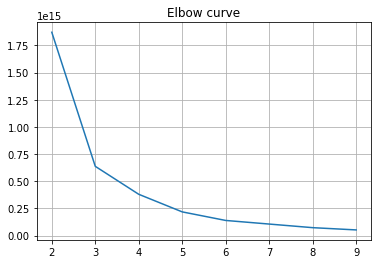

In [ ]:
# DEPOK
distorsions, k1, kN = [], 2, 10
for k in range(k1, kN):
    kmeans = cluster.KMeans(n_clusters=k).fit(dfdep)
    distorsions.append(kmeans.inertia_)
#fig = plt.figure(figsize=(15, 5))
plt.plot(range(k1, kN), distorsions); plt.grid(True)
plt.title('Elbow curve')

array([2, 0, 1, 0, 0, 1, 0, 1, 0, 1], dtype=int32)

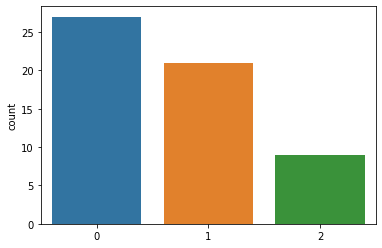

In [ ]:
k=3
kmPPD3 = cluster.KMeans(n_clusters=k, init='k-means++', max_iter=300, tol=0.0001, random_state = random_state)
kmPPD3.fit(dfdep)
C_kmppD3 = kmPPD3.predict(dfdep)

sns.countplot(C_kmppD3)
C_kmppD3[:10]

array([0, 0, 1, 0, 3, 1, 3, 1, 3, 1], dtype=int32)

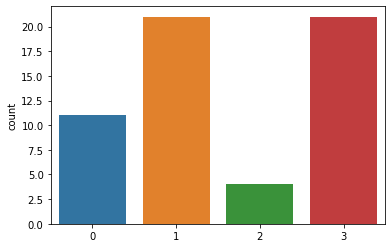

In [ ]:
k=4
kmPPD4 = cluster.KMeans(n_clusters=k, init='k-means++', max_iter=300, tol=0.0001, random_state = random_state)
kmPPD4.fit(dfdep)
C_kmppD4 = kmPPD4.predict(dfdep)

sns.countplot(C_kmppD4)
C_kmppD4[:10]

array([0, 0, 1, 0, 3, 1, 3, 4, 3, 4], dtype=int32)

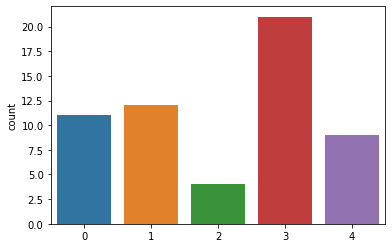

In [ ]:
k=5
kmPPD5 = cluster.KMeans(n_clusters=k, init='k-means++', max_iter=300, tol=0.0001, random_state = random_state)
kmPPD5.fit(dfdep)
C_kmppD5 = kmPPD5.predict(dfdep)

sns.countplot(C_kmppD5)
C_kmppD5[:10]

# Tangerang

Text(0.5, 1.0, 'Elbow curve')

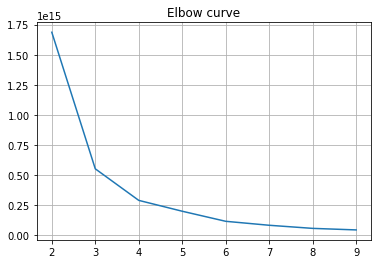

In [ ]:
# TANGERANG
distorsions, k1, kN = [], 2, 10
for k in range(k1, kN):
    kmeans = cluster.KMeans(n_clusters=k).fit(dftang)
    distorsions.append(kmeans.inertia_)
#fig = plt.figure(figsize=(15, 5))
plt.plot(range(k1, kN), distorsions); plt.grid(True)
plt.title('Elbow curve')

array([2, 1, 1, 0, 1, 0, 1, 0, 1, 2], dtype=int32)

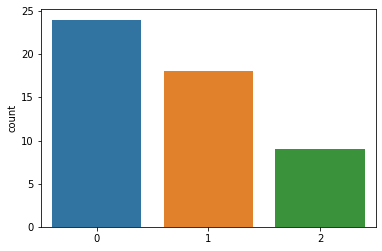

In [ ]:
k=3
kmPPT3 = cluster.KMeans(n_clusters=k, init='k-means++', max_iter=300, tol=0.0001, random_state = random_state)
kmPPT3.fit(dftang)
C_kmppT3 = kmPPT3.predict(dftang)

sns.countplot(C_kmppT3)
C_kmppT3[:10]

array([3, 0, 0, 1, 0, 1, 0, 1, 0, 3], dtype=int32)

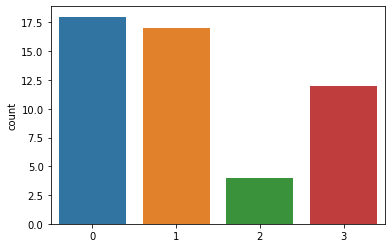

In [ ]:
k=4
kmPPT4 = cluster.KMeans(n_clusters=k, init='k-means++', max_iter=300, tol=0.0001, random_state = random_state)
kmPPT4.fit(dftang)
C_kmppT4 = kmPPT4.predict(dftang)

sns.countplot(C_kmppT4)
C_kmppT4[:10]

array([1, 0, 4, 3, 0, 3, 4, 3, 4, 1], dtype=int32)

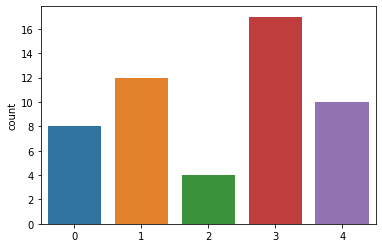

In [ ]:
k=5
kmPPT5 = cluster.KMeans(n_clusters=k, init='k-means++', max_iter=300, tol=0.0001, random_state = random_state)
kmPPT5.fit(dftang)
C_kmppT5 = kmPPT5.predict(dftang)

sns.countplot(C_kmppT5)
C_kmppT5[:10]